In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
import time


In [136]:
df = pd.read_csv("Churn_Modelling.csv")

In [140]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [142]:
df= df.drop(columns="RowNumber")

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [146]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [148]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [151]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

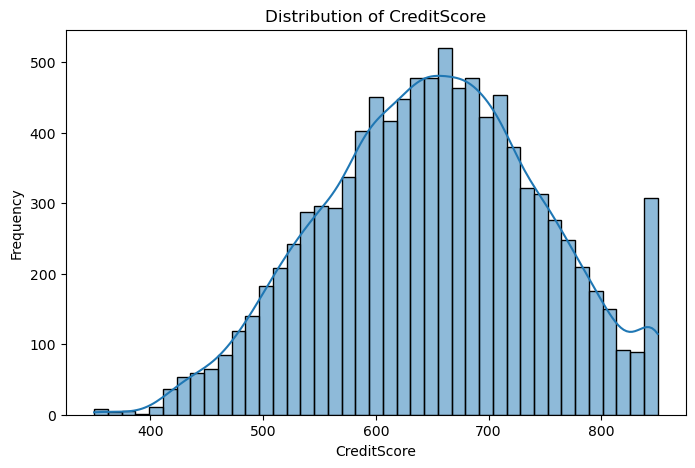

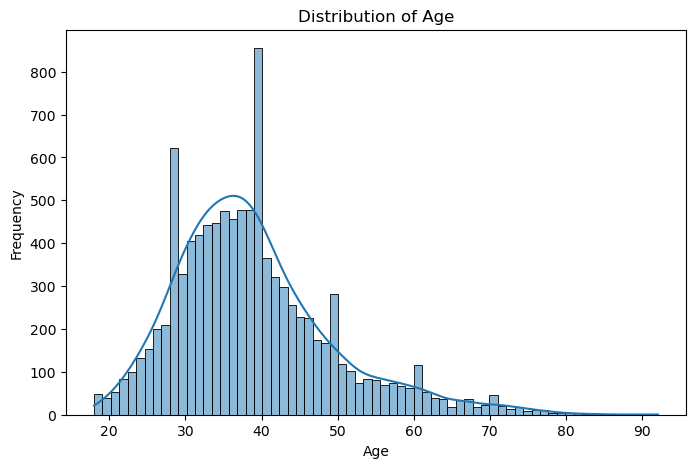

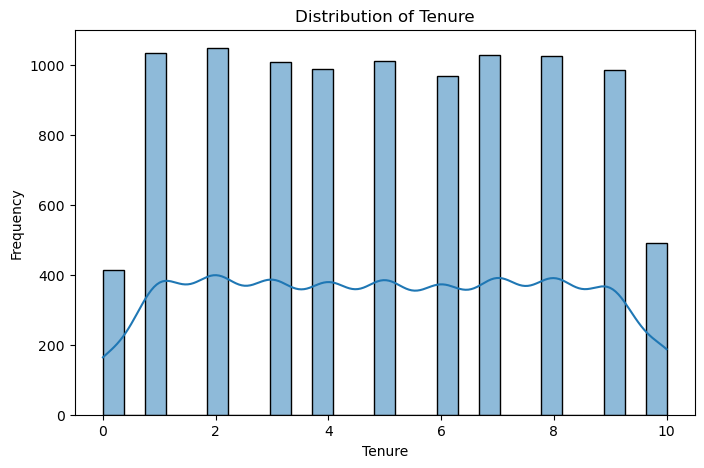

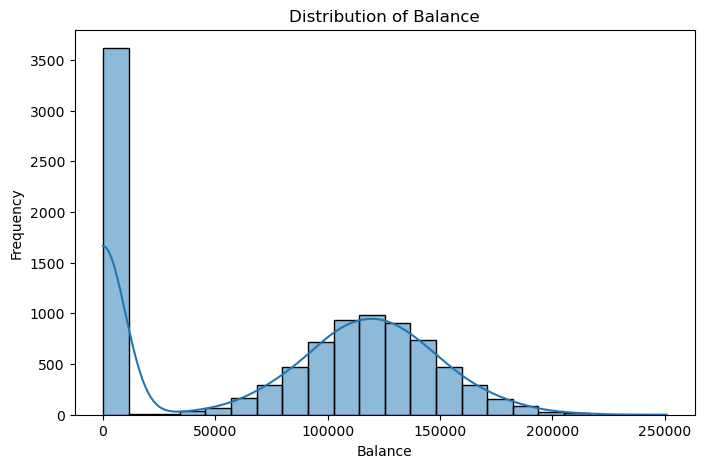

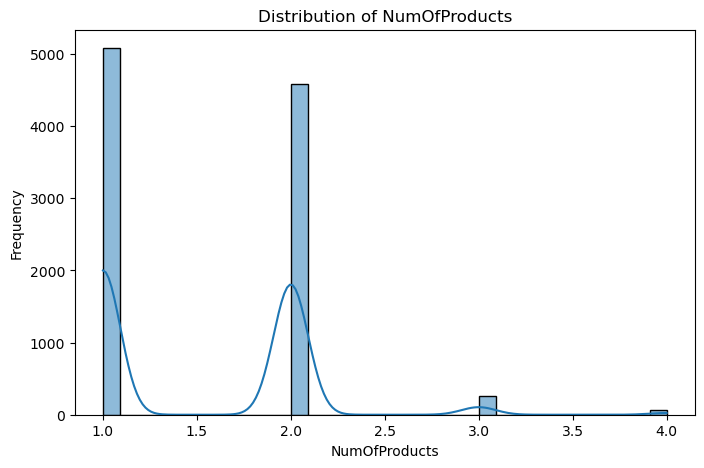

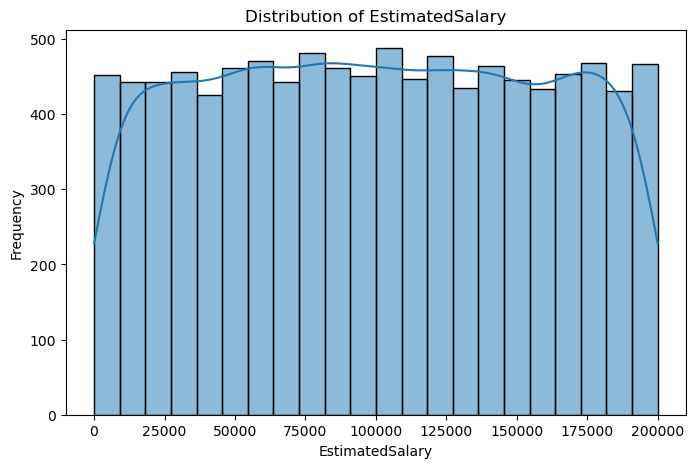

In [153]:
# Hist of numeric columns

for i in numerical_features:
    plt.figure(figsize=(8,5))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

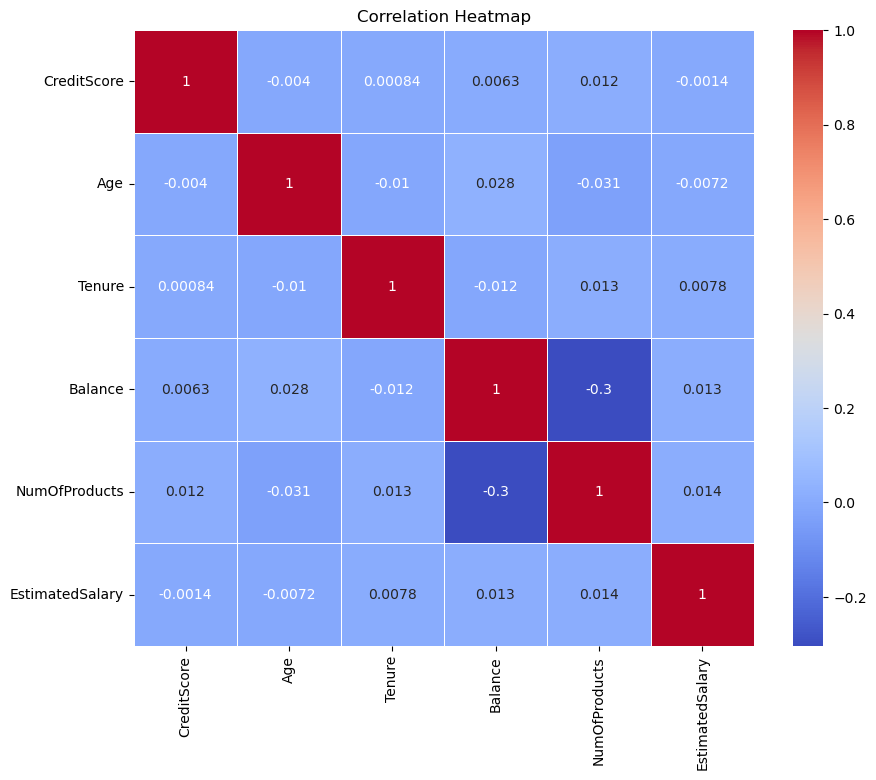

In [154]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

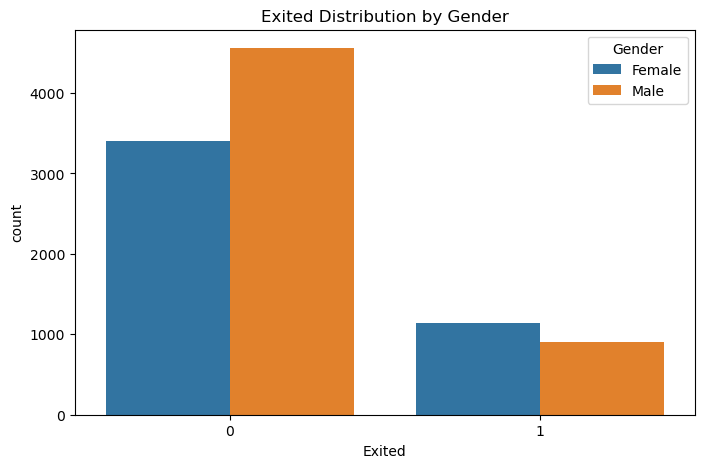

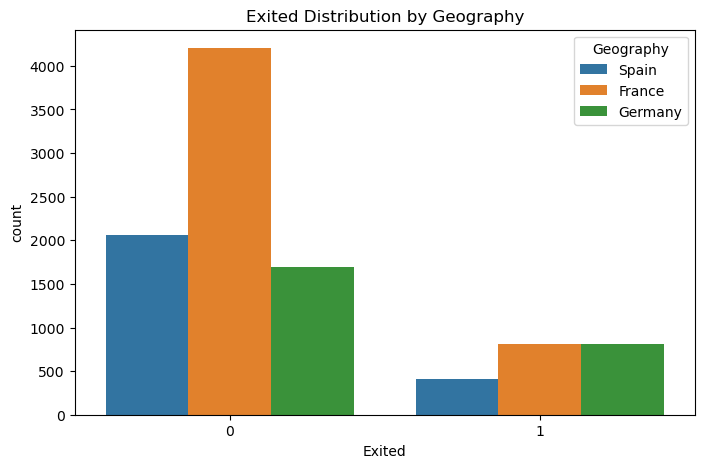

In [156]:
# Visualizing the relationship between features and target (Exited)
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=df, hue='Gender')
plt.title('Exited Distribution by Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=df, hue='Geography')
plt.title('Exited Distribution by Geography')
plt.show()

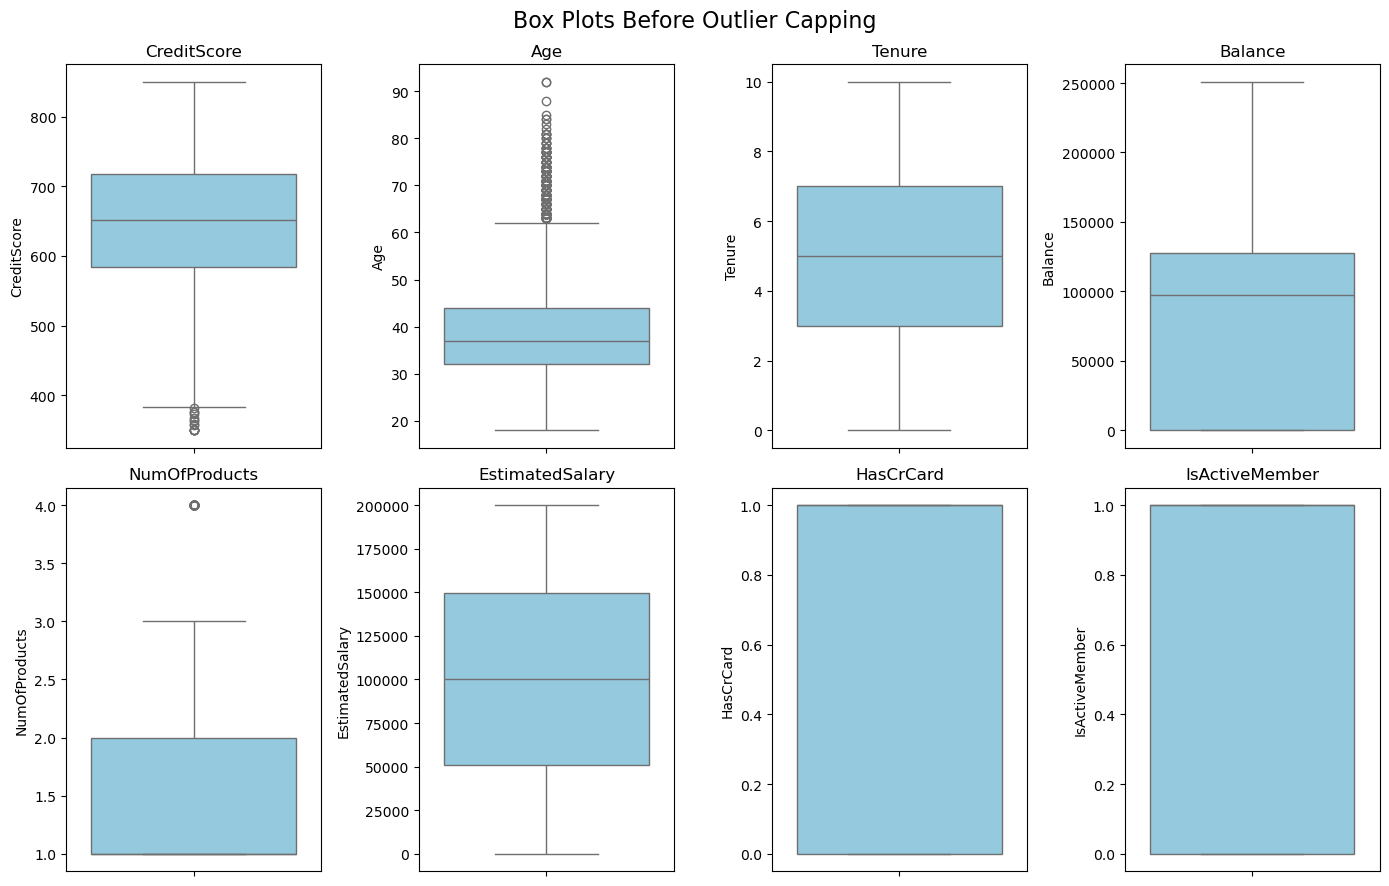

In [159]:
# Boxplot to detect outliers

# Function to create box plots for specified columns
def plot_boxplots(df, columns, title):
    plt.figure(figsize=(14, 9))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 4, i)  # Adjust grid size based on the number of columns
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(col)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Columns to visualize
columns_to_visualize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
                       'HasCrCard', 'IsActiveMember']

# Box plot before outlier capping
plot_boxplots(df, columns_to_visualize, "Box Plots Before Outlier Capping")

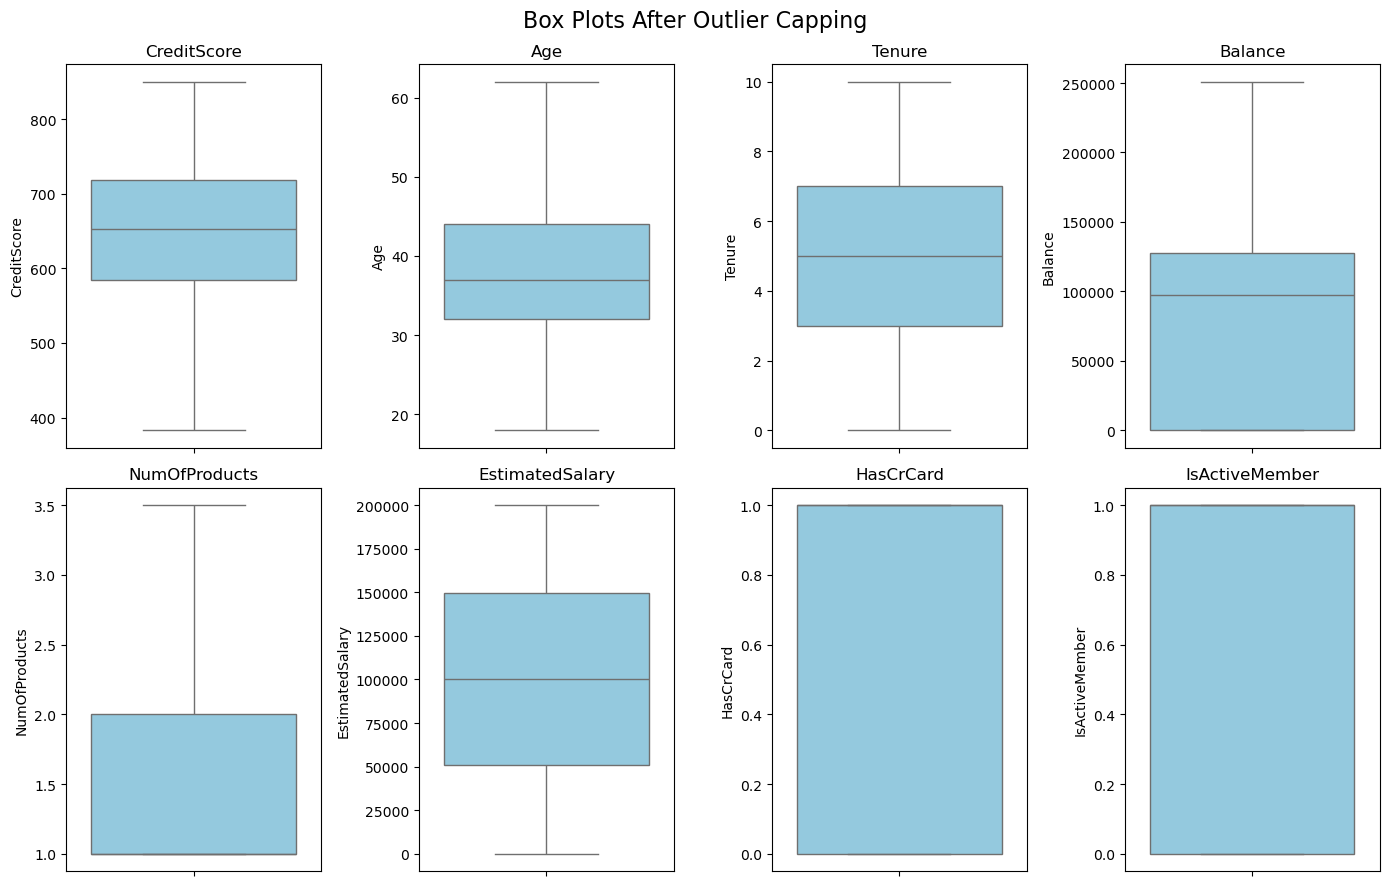

In [160]:
# Function to detect and cap outliers using IQR
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Columns to process
columns_to_process = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
                       'HasCrCard', 'IsActiveMember']

# Applying the outlier capping function
cleaned_df = cap_outliers(df, columns_to_process)


# Box plot after outlier capping
plot_boxplots(cleaned_df, columns_to_visualize, "Box Plots After Outlier Capping")

# K-Nearest Neighbors

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Label encoding for categorical variables
le = LabelEncoder()
cleaned_df['Geography'] = le.fit_transform(cleaned_df['Geography'])
cleaned_df['Gender'] = le.fit_transform(cleaned_df['Gender'])

# Feature scaling (Standardization) 
scaler = StandardScaler()
cleaned_df[['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore']] = scaler.fit_transform(
    cleaned_df[['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore']]
)

X = cleaned_df.drop(columns=['Exited', 'Surname'])
y = cleaned_df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
# Apply SMOTE only to the training data (train set only)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [169]:
# Apply scaling 
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)  # Fit scaler on resampled training data
X_test = scaler.transform(X_test)  # Transform test data using the already fitted scaler

In [171]:
accuracies = []

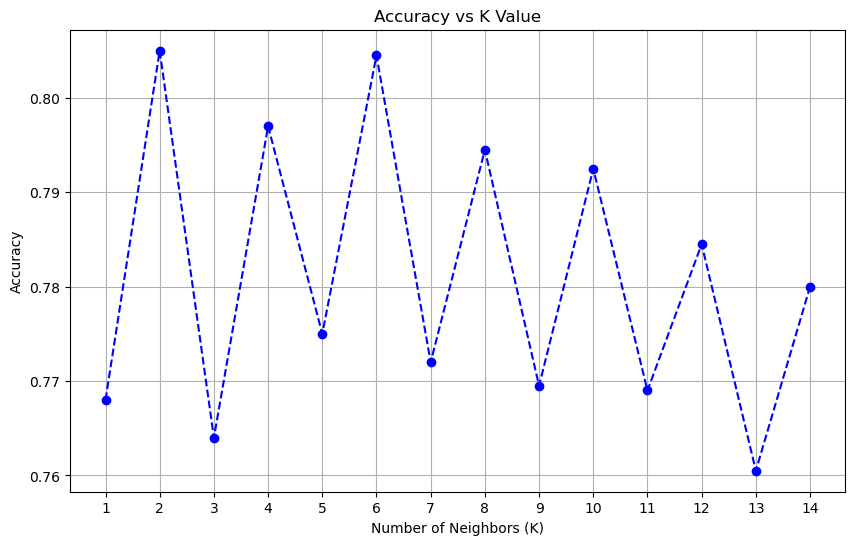

In [173]:
# Finding the optimal value of K
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res) 
    y_pred = knn.predict(X_test)  
    accuracies.append(accuracy_score(y_test, y_pred))
    

# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), accuracies, marker='o', linestyle='--', color='b')  
plt.title('Accuracy vs K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 15))
plt.grid()
plt.show()

In [174]:
# optimal K (where accuracy is maximum)
optimal_k = range(1, 15)[accuracies.index(max(accuracies))]
print(f"Optimal K: {optimal_k}")

Optimal K: 2


In [175]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, accuracy_score

# Start measuring time
start_time = time.time()

# Train the KNN model with the optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

# Record computational time for KNN
knn_time = time.time() - start_time
print(f"KNN Model - Computation Time: {knn_time:.4f} seconds")

Accuracy: 0.805
AUC: 0.663363687176491
Confusion Matrix:
 [[1441  166]
 [ 224  169]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1607
           1       0.50      0.43      0.46       393

    accuracy                           0.81      2000
   macro avg       0.68      0.66      0.67      2000
weighted avg       0.79      0.81      0.80      2000

KNN Model - Computation Time: 0.2582 seconds


# Decision Tree, Random Forest, and Gradient Boosting

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

#Initialize models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define parameter grid for tuning 'n_estimators'
param_grid = {
    'n_estimators': [50, 100, 200],  # Try different values for n_estimators
}

# Perform GridSearchCV for each model
models = {'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
     # Start the timer
    start_time = time.time()
    
    # Perform grid search only for models that support 'n_estimators'
    if  model_name == 'Random Forest' or model_name == 'Gradient Boosting' :
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_res, y_train_res)
        best_model = grid_search.best_estimator_
        print(f"Best {model_name} model with n_estimators: {grid_search.best_params_['n_estimators']}")
    else:
        best_model = model  # For Decision Tree, we won't tune n_estimators (it's not relevant)

    # Train and evaluate the best model
    best_model.fit(X_train_res, y_train_res)
    y_pred = best_model.predict(X_test)

    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report :\n", classification_report(y_test, y_pred))
    # Stop the timer
    end_time = time.time()
    
    # total computational time
    computational_time = end_time - start_time
    print(f"Computation Time: {computational_time:.4f} seconds")
    print("-" * 40)
     

Tuning Decision Tree...
Decision Tree:
Accuracy: 0.7795
Recall: 0.5292620865139949
Precision: 0.4482758620689655
AUC: 0.6849795186770348
Confusion Matrix:
 [[1351  256]
 [ 185  208]]
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.45      0.53      0.49       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

Computation Time: 0.2456 seconds
----------------------------------------
Tuning Random Forest...
Best Random Forest model with n_estimators: 200
Random Forest:
Accuracy: 0.858
Recall: 0.5419847328244275
Precision: 0.6719242902208202
AUC: 0.738633934551604
Confusion Matrix:
 [[1503  104]
 [ 180  213]]
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67     

# Support Vector Machine (SVM)

In [118]:
from sklearn.svm import SVC

In [120]:
# Re-start measuring time for SVM models
start_time = time.time()

# parameter grid for each kernel type
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'degree': [2, 3, 4]  # Only relevant for Polynomial kernel
}

In [122]:
# Sigmoid Kernel SVM - Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

sigmoid_svm = SVC(kernel='sigmoid', class_weight='balanced', random_state=42)
grid_search_sigmoid = GridSearchCV(estimator=sigmoid_svm, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_sigmoid.fit(X_train_res, y_train_res)

# Best parameters and score for Sigmoid kernel
print("Sigmoid Kernel - Best Parameters:", grid_search_sigmoid.best_params_)
print("Sigmoid Kernel - Best Cross-Validation Score:", grid_search_sigmoid.best_score_)

# Record computational time for Sigmoid Kernel SVM
sigmoid_svm_time = time.time() - start_time
print(f"Sigmoid Kernel SVM - Computation Time: {sigmoid_svm_time:.4f} seconds")


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Sigmoid Kernel - Best Parameters: {'C': 100, 'degree': 2, 'gamma': 0.001}
Sigmoid Kernel - Best Cross-Validation Score: 0.7351364744147576
Sigmoid Kernel SVM - Computation Time: 153.2979 seconds


In [124]:
# Predict using the best Sigmoid model
best_sigmoid_svm = grid_search_sigmoid.best_estimator_
y_pred_sigmoid = best_sigmoid_svm.predict(X_test)

# Evaluate the Sigmoid Kernel model
print("\nSigmoid Kernel SVM - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sigmoid))
print("Sigmoid Kernel SVM - Classification Report:\n", classification_report(y_test, y_pred_sigmoid))
print("Sigmoid Kernel SVM - Accuracy:", accuracy_score(y_test, y_pred_sigmoid))
print("Sigmoid Kernel SVM - Recall:", recall_score(y_test, y_pred_sigmoid))
print("Sigmoid Kernel SVM - Precision:", precision_score(y_test, y_pred_sigmoid))
print("Sigmoid Kernel SVM - AUC:", roc_auc_score(y_test, y_pred_sigmoid))


Sigmoid Kernel SVM - Confusion Matrix:
 [[1162  445]
 [ 131  262]]
Sigmoid Kernel SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1607
           1       0.37      0.67      0.48       393

    accuracy                           0.71      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.71      0.74      2000

Sigmoid Kernel SVM - Accuracy: 0.712
Sigmoid Kernel SVM - Recall: 0.6666666666666666
Sigmoid Kernel SVM - Precision: 0.37057991513437055
Sigmoid Kernel SVM - AUC: 0.6948765816220701


In [126]:
# Re-start measuring time for Polynomial Kernel SVM
start_time = time.time()

# Polynomial Kernel SVM - Hyperparameter Tuning
poly_svm = SVC(kernel='poly', class_weight='balanced', random_state=42)
grid_search_poly = GridSearchCV(estimator=poly_svm, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_poly.fit(X_train_res, y_train_res)

# Best parameters and score for Polynomial kernel
print("\nPolynomial Kernel - Best Parameters:", grid_search_poly.best_params_)
print("Polynomial Kernel - Best Cross-Validation Score:", grid_search_poly.best_score_)

# Record computational time for Polynomial Kernel SVM
poly_svm_time = time.time() - start_time
print(f"Polynomial Kernel SVM - Computation Time: {poly_svm_time:.4f} seconds")

Fitting 3 folds for each of 60 candidates, totalling 180 fits

Polynomial Kernel - Best Parameters: {'C': 100, 'degree': 4, 'gamma': 0.1}
Polynomial Kernel - Best Cross-Validation Score: 0.832763026186866
Polynomial Kernel SVM - Computation Time: 405.3584 seconds


In [128]:

# Predict using the best Polynomial model
best_poly_svm = grid_search_poly.best_estimator_
y_pred_poly = best_poly_svm.predict(X_test)

# Evaluate the Polynomial Kernel model
print("\nPolynomial Kernel SVM - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Polynomial Kernel SVM - Classification Report:\n", classification_report(y_test, y_pred_poly))
print("Polynomial Kernel SVM - Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Polynomial Kernel SVM - Recall:", recall_score(y_test, y_pred_poly))
print("Polynomial Kernel SVM - Precision:", precision_score(y_test, y_pred_poly))
print("Polynomial Kernel SVM - AUC:", roc_auc_score(y_test, y_pred_poly))


Polynomial Kernel SVM - Confusion Matrix:
 [[1371  236]
 [ 166  227]]
Polynomial Kernel SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1607
           1       0.49      0.58      0.53       393

    accuracy                           0.80      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.80      0.80      2000

Polynomial Kernel SVM - Accuracy: 0.799
Polynomial Kernel SVM - Recall: 0.5776081424936387
Polynomial Kernel SVM - Precision: 0.490280777537797
Polynomial Kernel SVM - AUC: 0.7153753220246662


In [130]:
# Re-start measuring time for RBF Kernel SVM
start_time = time.time()

# RBF Kernel SVM - Hyperparameter Tuning
rbf_svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
grid_search_rbf = GridSearchCV(estimator=rbf_svm, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_rbf.fit(X_train_res, y_train_res)

# Best parameters and score for RBF kernel
print("\nRBF Kernel - Best Parameters:", grid_search_rbf.best_params_)
print("RBF Kernel - Best Cross-Validation Score:", grid_search_rbf.best_score_)

# Record computational time for RBF Kernel SVM
rbf_svm_time = time.time() - start_time
print(f"RBF Kernel SVM - Computation Time: {rbf_svm_time:.4f} seconds")

Fitting 3 folds for each of 60 candidates, totalling 180 fits

RBF Kernel - Best Parameters: {'C': 10, 'degree': 2, 'gamma': 0.1}
RBF Kernel - Best Cross-Validation Score: 0.8483397512843048
RBF Kernel SVM - Computation Time: 371.2440 seconds


In [132]:
# Predict using the best RBF model
best_rbf_svm = grid_search_rbf.best_estimator_
y_pred_rbf = best_rbf_svm.predict(X_test)

# Evaluate the RBF Kernel model
print("\nRBF Kernel SVM - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("RBF Kernel SVM - Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("RBF Kernel SVM - Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Kernel SVM - Recall:", recall_score(y_test, y_pred_rbf))
print("RBF Kernel SVM - Precision:", precision_score(y_test, y_pred_rbf))
print("RBF Kernel SVM - AUC:", roc_auc_score(y_test, y_pred_rbf))


RBF Kernel SVM - Confusion Matrix:
 [[1421  186]
 [ 170  223]]
RBF Kernel SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1607
           1       0.55      0.57      0.56       393

    accuracy                           0.82      2000
   macro avg       0.72      0.73      0.72      2000
weighted avg       0.82      0.82      0.82      2000

RBF Kernel SVM - Accuracy: 0.822
RBF Kernel SVM - Recall: 0.5674300254452926
RBF Kernel SVM - Precision: 0.5452322738386308
RBF Kernel SVM - AUC: 0.7258432018950173


# Neural Network


In [179]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Number of hidden layers and their sizes
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant'],  # Learning rate scheduling
    'max_iter': [200]  # Max number of iterations for convergence
}

# Neural Network with 'adam' solver
mlp_adam = MLPClassifier(solver='adam', random_state=42)

# Start the timer for 'adam'
start_time_adam = time.time()

# Perform Grid Search with Cross-Validation
grid_search_adam = GridSearchCV(mlp_adam, param_grid, cv=5, n_jobs=-1)
grid_search_adam.fit(X_train_res, y_train_res)

# Get the best model from the grid search
best_mlp_adam = grid_search_adam.best_estimator_

# Make predictions using the best model
y_pred_adam_proba = best_mlp_adam.predict_proba(X_test)
y_pred_adam = (y_pred_adam_proba[:, 1] > 0.5).astype("int32")

# Stop the timer for 'adam'
end_time_adam = time.time()
computational_time_adam = end_time_adam - start_time_adam

# Output the best parameters and score for 'adam'
print("Best parameters for adam solver:", grid_search_adam.best_params_)
print("Best score for adam solver:", grid_search_adam.best_score_)
# Print evaluation metrics for 'adam'
print("\nEvaluation metrics for 'adam' solver:")
print("Accuracy:", accuracy_score(y_test, y_pred_adam))
print("Recall:", recall_score(y_test, y_pred_adam))
print("Precision:", precision_score(y_test, y_pred_adam))
print("AUC:", roc_auc_score(y_test, y_pred_adam))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adam))
print("Classification Report:\n", classification_report(y_test, y_pred_adam))
print(f"Computational Time for adam solver: {computational_time_adam:.4f} seconds")
print("-" * 40)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

Best parameters for adam solver: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200}
Best score for adam solver: 0.860457193703392

Evaluation metrics for 'adam' solver:
Accuracy: 0.8365
Recall: 0.5877862595419847
Precision: 0.5833333333333334
AUC: 0.7425552330690632
Confusion Matrix:
 [[1442  165]
 [ 162  231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.58      0.59      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.84      0.84      0.84      2000

Computational Time for adam solver: 92.4219 seconds
----------------------------------------


In [181]:
# Neural Network with 'lbfgs' solver
mlp_lbfgs = MLPClassifier(solver='lbfgs', random_state=42)

# Start the timer for 'lbfgs'
start_time_lbfgs = time.time()

# Perform Grid Search with Cross-Validation
grid_search_lbfgs = GridSearchCV(mlp_lbfgs, param_grid, cv=5, n_jobs=-1)
grid_search_lbfgs.fit(X_train_res, y_train_res)

# Get the best model from the grid search
best_mlp_lbfgs = grid_search_lbfgs.best_estimator_

# Make predictions using the best model
y_pred_lbfgs_proba = best_mlp_lbfgs.predict_proba(X_test)
y_pred_lbfgs = (y_pred_lbfgs_proba[:, 1] > 0.5).astype("int32")

# Stop the timer for 'lbfgs'
end_time_lbfgs = time.time()
computational_time_lbfgs = end_time_lbfgs - start_time_lbfgs

# Output the best parameters and score for 'lbfgs'
print("Best parameters for lbfgs solver:", grid_search_lbfgs.best_params_)
print("Best score for lbfgs solver:", grid_search_lbfgs.best_score_)

# Print evaluation metrics for 'lbfgs'
print("\nEvaluation metrics for 'lbfgs' solver:")
print("Accuracy:", accuracy_score(y_test, y_pred_lbfgs))
print("Recall:", recall_score(y_test, y_pred_lbfgs))
print("Precision:", precision_score(y_test, y_pred_lbfgs))
print("AUC:", roc_auc_score(y_test, y_pred_lbfgs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lbfgs))
print("Classification Report:\n", classification_report(y_test, y_pred_lbfgs))
print(f"Computational Time for lbfgs solver: {computational_time_lbfgs:.4f} seconds")
print("-" * 40)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

Best parameters for lbfgs solver: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200}
Best score for lbfgs solver: 0.8636057451488218

Evaluation metrics for 'lbfgs' solver:
Accuracy: 0.849
Recall: 0.6055979643765903
Precision: 0.6181818181818182
AUC: 0.7570615833083947
Confusion Matrix:
 [[1460  147]
 [ 155  238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1607
           1       0.62      0.61      0.61       393

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000

Computational Time for lbfgs solver: 49.8346 seconds
----------------------------------------
